<a href="https://colab.research.google.com/github/Kurtiadam/speedcam_cvs/blob/main/OCR/OCR_tryings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!sudo apt install tesseract-ocr
!pip install pytesseract

!gdown https://drive.google.com/uc?id=1DlSijY3W4TVgQ0u7WOoAR062dZGU9ZqZ
!gdown https://drive.google.com/uc?id=1h68_ujBlyFWElTKJkyfSQaRNQ7fD86nM
!gdown https://drive.google.com/uc?id=12NS_6E_RqafeeV_ocxFkTCrit8W89tf6
!gdown https://drive.google.com/uc?id=1BjUBwhLM90CWCj-ShFrEXjlWn3vtHuhY
!gdown https://drive.google.com/uc?id=1nTMm8Ampr-fiKNvkYzFqMGcRujk8iiHx
!gdown https://drive.google.com/uc?id=1BES-c73I0Nfk37EHXhliDLqz8NfQBC4X

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2build2).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Downloading...
From: https://drive.google.com/uc?id=1DlSijY3W4TVgQ0u7WOoAR062dZGU9ZqZ
To: /content/RH-BCC1-LPR_giorno_post_md.png
100% 508k/508k [00:00<00:00, 118MB/s]
Downloading...
From: https://drive.google.com/uc?id=1h68_ujBlyFWElTKJkyfSQaRNQ7fD86nM
To: /content/car.jpg
100% 115k/115k [00:00<00:00, 93.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=12NS_6E_RqafeeV_ocxFkTCrit8W89tf6
To: /content/test_lp.png
100% 11.1k/11.1k [00:00<00:00, 41.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1BjUBwhLM90CWCj-ShFrEXjlWn3vtHuhY
To: /content/test_lp2.png
100% 14.1k/14.1k [00:00<00:00, 52.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1nTMm8Amp

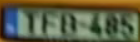

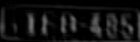

93.99999


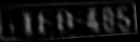

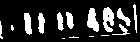

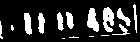

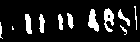

OCR PRED:  PTES CONF:  [-1.0, -1.0, -1.0, -1.0, 0.0]


In [15]:
import pytesseract as pt
from pytesseract import Output
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

test_lp = cv2.imread('/content/test_lp2.png')
w,h = test_lp.shape[:2]

# Edge detection and correction
cv2_imshow(test_lp)
test_lp_gray = cv2.cvtColor(test_lp, cv2.COLOR_BGR2GRAY)

rectKern = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))
blackhat = cv2.morphologyEx(test_lp_gray, cv2.MORPH_BLACKHAT, rectKern)
cv2_imshow(blackhat)

edges = cv2.Canny(blackhat, 50, 150, apertureSize=3)
lines = cv2.HoughLines(blackhat, 1, np.pi / 180, 120)
# if lines is not None:
#     for line in lines:
#         rho, theta = line[0]
#         a = np.cos(theta)
#         b = np.sin(theta)
#         x0 = a * rho
#         y0 = b * rho
#         x1 = int(x0 + 1000 * (-b))
#         y1 = int(y0 + 1000 * (a))
#         x2 = int(x0 - 1000 * (-b))
#         y2 = int(y0 - 1000 * (a))
        
#         cv2.line(test_lp, (x1, y1), (x2, y2), (0, 0, 255), 2)
# cv2.imshow('Lines', test_lp)

angles = []
for line in lines:
    rho, theta = line[0]
    angle = np.rad2deg(theta)
    angles.append(angle)
predominant_angle = np.median(angles)
print(predominant_angle)
rotation_matrix = cv2.getRotationMatrix2D((w / 2, h / 2),predominant_angle-90, 1)
corrected_image = cv2.warpAffine(blackhat, rotation_matrix, (h, w))
cv2_imshow(corrected_image)


# Enhancing image
test_lp_gray_bw = cv2.threshold(corrected_image, 0, 255,cv2. THRESH_BINARY | cv2.THRESH_OTSU)[1]
cv2_imshow(test_lp_gray_bw)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
eroded_image = cv2.erode(test_lp_gray_bw, kernel, iterations=1)
# dilated_image = cv2.dilate(eroded_image, kernel, iterations=1)


# pytesseract
alphanumeric = "ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789-"
options = "-c tessedit_char_whitelist={}".format(alphanumeric)
options += " --psm {}".format(7)

data = pt.image_to_data(test_lp, config=options, output_type=Output.DICT)
confidences = data['conf']
confidences = [float(c) for c in confidences if c != '-1']
conf = np.mean(confidences) / 100
text = data['text']
text = ' '.join(text).strip()
cv2_imshow(test_lp_gray_bw)
cv2_imshow(eroded_image)
print("OCR PRED: ", text, "CONF: ", confidences)